In [16]:
import pandas as pd
from colorthief import ColorThief
import cv2 as cv
import numpy as np
import matplotlib
# import colormath
from PIL import Image
from tqdm import tqdm

from colormath.color_objects import sRGBColor, LabColor

from colormath.color_conversions import convert_color

from colormath.color_diff import delta_e_cie2000
import os

In [17]:
pathname = "minion"
pathext = "jpeg"
# pathname = "minnie"
# pathext = "jpg"
path = pathname+'.'+pathext
print(path)
image = cv.imread(path)
height, width, _ = image.shape

# size = int(input("How many inches across?"))
# size = 14*size
size = 30
factor = size/width


height = int(height * factor)
width = int(width * factor)

image_resize =cv.resize(image, (width, height), interpolation=cv.INTER_NEAREST)


# cv.imshow("lala", image)
# cv.waitKey(0)
# cv.imshow("lala2", image_resize)
# cv.waitKey(0)

minion.jpeg


In [18]:
import colormath.color_diff

import numpy
import random
# from matplotlib.lines import Line2D


def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)

img = ColorThief(path)

# num_colors = input("How many colors?")
num_colors = 10

palette = img.get_palette(color_count=num_colors)
palette.append((255, 255, 255))




# for each pixel, calculate its difference from each of the palette colors and pick the closest difference
reshaped = image_resize.reshape(-1, image_resize.shape[-1])
image_list = np.unique(reshaped, axis=0)

unique=[]
for pixel in tqdm(image_list):

        closest = 10000000
        pixel_rgb = sRGBColor(pixel[2], pixel[1], pixel[0])
        closecolor = (0, 0, 0)
        pixelcolor = convert_color(pixel_rgb, LabColor)
        for color in palette:
            color_rgb = sRGBColor(color[0], color[1], color[2])
            color_lab = convert_color(color_rgb, LabColor)
            closer = delta_e_cie2000(color_lab, pixelcolor)
            unique.append(closer)
            if closer<closest:
                # print(closer, closest)
                closest = closer
                closecolor = color
        
        
        mask = np.all(image_resize==(pixel[0], pixel[1], pixel[2]), axis=-1)
          
        # print(symb_dict[closecolor])
      
        # image_resize[mask] = symb_dict[closecolor]
        image_resize[mask] = (closecolor[2], closecolor[1], closecolor[0])


100%|██████████| 327/327 [00:01<00:00, 185.56it/s]


In [19]:
symbols={'.': 'point',

 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',

 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',

 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

In [20]:
from PIL import ImageDraw

image_rgb = image_resize[:, :, ::-1]

# print(image_r)
image = Image.fromarray(image_rgb)
pixel_width = image.width
pixel_height = image.height
scale = 40
image = image.resize((pixel_width*scale, pixel_height*scale), resample=Image.Resampling.NEAREST)
# image = Image.new('RGBA', image.size, 'white')
# Draw some lines
draw = ImageDraw.Draw(image)
y_start = 0
y_end = image.height
step_size = scale

for x in range(0, image.width, step_size):
    line = ((x, y_start), (x, y_end))
    draw.line(line, fill='black', width=0)

x_start = 0
x_end = image.width

for y in range(0, image.height, step_size):
    line = ((x_start, y), (x_end, y))
    draw.line(line, fill='black', width=0)

del draw

image.save('gridimage.png')

# resized_image = image.resize((new_width, new_height), Image.NEAREST)


In [21]:
import os

print(os.listdir("symbols"))

symbols=[]
for imgname in os.listdir("symbols"):
    # print(imgname)
    symbols.append(r"symbols/"+imgname)
    # symbols.append(imgname.replace(".png", ""))
    
print(symbols)

['aries.png', 'camera.png', 'cloud.png', 'divide.png', 'ex.png', 'filledcircle.png', 'filledheart.png', 'filledsun.png', 'foursquare.png', 'halfcircle.png', 'heartoutline.png', 'house.png', 'lefttriangle.png', 'loading.png', 'location.png', 'lock.png', 'magnify.png', 'moon.png', 'no.png', 'opencircle.png', 'opensquare.png', 'outwardarrow.png', 'paperclip.png', 'pause.png', 'phone.png', 'plus.png', 'power.png', 'rightarrow.png', 'star.png', 'textbubble.png', 'triangleup.png', 'twodot.png', 'uparrow.png', 'waves.png', 'x.png']
['symbols/aries.png', 'symbols/camera.png', 'symbols/cloud.png', 'symbols/divide.png', 'symbols/ex.png', 'symbols/filledcircle.png', 'symbols/filledheart.png', 'symbols/filledsun.png', 'symbols/foursquare.png', 'symbols/halfcircle.png', 'symbols/heartoutline.png', 'symbols/house.png', 'symbols/lefttriangle.png', 'symbols/loading.png', 'symbols/location.png', 'symbols/lock.png', 'symbols/magnify.png', 'symbols/moon.png', 'symbols/no.png', 'symbols/opencircle.png', '

In [ ]:
#creating grid using pillow to OVERLAY.T
# download set of images that can be used as a pattern

# assign each to a tuple, use grid to do so.
# max 16 colors?

from itertools import product
from math import isqrt
from PIL import Image

# Parameters
# image.show()
image_pix = image.copy()
width = image_pix.width
height = image_pix.height
n_images = int((width*height)/(scale**2))
# image_pix.show()
# Dummy sample list of images
sample_list = []

#replace symbol list with images
#replace all colors with symbols

image2= image_resize.astype(str)



palette_2 = np.array(palette, dtype=str)

symb = random.sample(symbols, num_colors)

symb_dict={}

for i in range(len(palette)):
    color = palette_2[i]
    # print(color)
    # print(color)
    symb_dict[str(color)]=symb[i]
#create new np array and use mask on it instead
image_names= np.zeros((image2.shape[0], image2.shape[1])).astype(str)

for color in palette_2:
    color_reverse = [color[2], color[1], color[0]]


    mask = np.all(image2==color_reverse, axis=-1)
    # print(np.count_nonzero(mask))
    # image2[mask]=symb_dict[str(color)]
    image_names[mask]=symb_dict[str(color)]

# image2 = image2[:,:, ::3].squeeze()
# image_names= np.zeros((image2.shape[0], image2.shape[1])).astype(str)
# uniques = np.unique(image_names)
# for row in range(image_names.shape[0]-1):
#     for cell in range(image_names.shape[1]-1):
#         # print((image2[row][cell])[0])
#         image_names[row][cell] = image2[row][cell][0]
# print(image_names[0])
# sample_list = [[Image.open(image_name).resize((width, height)) for image_name in row] for row in image_names]
sample_list = image_names.flatten('F')
print(f"{len(sample_list)}")
# Determine positions from given parameters
x_pos = [(i * scale+ pixel_width//4)  for i in range(pixel_width)]
y_pos = [(i * scale+ pixel_width//4)  for i in range(pixel_height)]
# positions = list(product(y_pos, x_pos))
positions = list(product(x_pos, y_pos))
print(f"{len(positions)}")
print(f"{pixel_height*pixel_width}")
# Build and save final image
a = image_pix.copy().convert('RGBA')
print(a.size)

# a.save('im1.png')
for i in tqdm(range(len(positions))): #positions and sample list aren't the same size... need to figure that out
    symbol = Image.open(sample_list[i]).resize((width//int(scale*1.5), height//int(scale*1.5)), resample=Image.Resampling.NEAREST).convert('RGBA')
    # if (i%300==0):
    #     print(f"{sample_list[i]}")
        # symbol.save(f'symbol{i}.png')
        # symbol.show()
    a.paste(symbol, positions[i], mask=symbol)
a.save(f'patterns/img{pathname}.png')

1200
1200
1200
(1200, 1600)


100%|██████████| 1200/1200 [00:00<00:00, 1465.44it/s]


In [ ]:
#get close colors, create the color key as well

#make box color and with symbol in it, paste onto another image which has the dmc colors
#print the symbol to the color

#use original palette, find the closest rgb based on dmc_floss.

array([1, 2, 3, 4])

In [6]:
#replace all colors with symbols

image2= image_resize.astype(str)

palette_2 = np.array(palette, dtype=str)

symb = random.sample(list(symbols.keys()), num_colors)

symb_dict={}

for i in range(len(palette)):
    color = palette_2[i]
    # print(color)
    # print(color)
    symb_dict[str(color)]=symb[i]

for color in palette_2:
    color_reverse = [color[2], color[1], color[0]]


    mask = np.all(image2==color_reverse, axis=-1)
    # print(np.count_nonzero(mask))
    image2[mask]=symb_dict[str(color)]

image_2= np.zeros((image2.shape[0], image2.shape[1])).astype(str)
uniques = np.unique(image_2)
for row in range(image_2.shape[0]-1):
    for cell in range(image_2.shape[1]-1):
        # print((image2[row][cell])[0])
        image_2[row][cell] = image2[row][cell][0]

In [7]:
cv.imshow("string", image)
cv.waitKey(0)
cv.imshow("first", image_resize)
cv.waitKey(0)

indices = []

for i in range(len(image2)-1):
    for j in range(len(image2[0])-1):
        indices.append((i,j))

TypeError: Image data of dtype <U32 cannot be converted to float

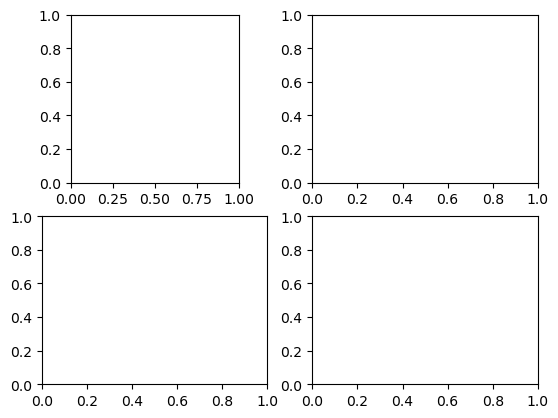

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



nrows = image_2.shape[0]
ncols = image_2.shape[1]
# data = np.array(image_2).astype(float)
# Cellid = [2, 4 ,5, 11 ,45 ,48 ,98]
# Cellval = [20, 45 ,55
# Create a grid
x = np.arange(nrows-1)
y = np.arange(ncols-1)
X, Y = np.meshgrid(x,y)

# Create a figure and axes
fig, axes = plt.subplots(2,2)

# Fill specific cells with markers
for i, ax in enumerate(axes.flat):
    ax.imshow(image_2[i])
    ax.axis('off')
# for i, j in tqdm(indices[:1000]):
#     ax.scatter(X[i, j], Y[i, j], marker=str(data[i,j]), s=10)  # Adjust fontsize as needed
#     # ax.text(X[i, j], Y[i, j], str(data[i,j]), ha='center', va='center', fontsize=16)  # Adjust fontsize as needed

# # Add grid lines
# ax.grid(True)
plt.imshow(image_resize, cmap='viridis')

plt.show()

#TRY TINKTER
# import tkinter as tk
# from PIL import Image, ImageTk

# # Create the main window
# root = tk.Tk()

# # Load the image
# image = Image.open("your_image.jpg")  # Replace with the path to your image
# image = ImageTk.PhotoImage(image)

# # Create a label with the image
# label = tk.Label(root, image=image)

# # Place the label in a grid cell
# label.grid(row=0, column=0)

# # Start the GUI
# root.mainloop()

# https://stackoverflow.com/questions/65676937/function-to-make-grid-of-images
# imagemagick

# https://stackoverflow.com/questions/55517072/python-plotting-grid-based-on-values

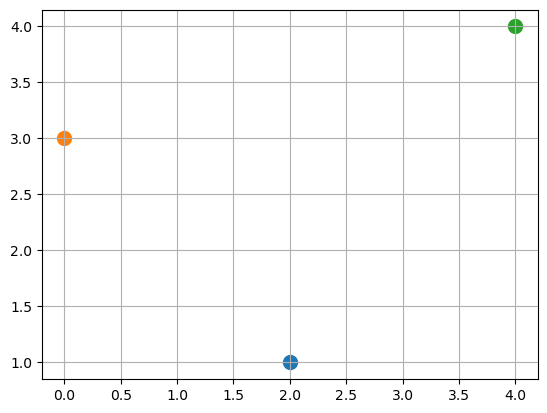

In [ ]:
# Create a grid
x = np.arange(5)
y = np.arange(5)
X, Y = np.meshgrid(x, y)

# Create a figure and axes
fig, ax = plt.subplots()

# Fill specific cells with markers
marker_indices = [(1, 2), (3, 0), (4, 4)]
for i, j in marker_indices:
    ax.scatter(X[i, j], Y[i, j], marker='o', s=100)  # Adjust marker size as needed

# Add grid lines
ax.grid(True)
plt.show()

In [3]:
path = "minion.jpeg"
image = Image.open(path)
height, width = image.size

# size = int(input("How many inches across?"))
# size = 14*size
size = 400
factor = size/width


height = int(height * factor)
width = int(width * factor)

image_resize =image.resize((height, width), resample=Image.Resampling.LANCZOS)

image_resize.show()

In [8]:
# num_colors = input("How many colors?")
num_colors = 6
result = image.convert('P', palette=Image.ADAPTIVE, colors = num_colors).quantize(method=Image.Quantize.FASTOCTREE,colors=num_colors)
result.convert('RGB').show()